In [6]:
import lmfit
import numpy as np
import matplotlib.pyplot as plt

<ErrorbarContainer object of 3 artists>

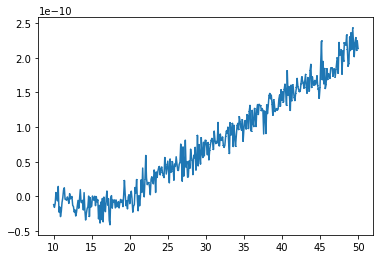

In [9]:
with open('Data/stickstoff.csv', mode='r') as tf:
        dataex = np.genfromtxt((line.replace(',', '.') for line in tf),delimiter=";",skip_header=21).T


data = np.zeros((2,len(dataex[3])))

data[0] = dataex[3]
data[1] = dataex[4]

err = np.zeros(len(data[1]))
for i in range(len(err)):
    err[i] = (data[1,i])*0.005
data = np.vstack([data,err])

plt.errorbar(data[0],data[1],yerr=data[2])


In [14]:
von = 20
bis = 50

model_lin=lmfit.models.linear()
pars_lin=model_lin.guess(data=data[1,von:bis],x=data[0,von:bis])
   #Fitten
out_lin = model_lin.fit(data[1,von:bis],x=data[0,von:bis],weights=1/data[2,von:bis],params=pars_lin,nan_policy='propagate')

    

TypeError: linear() missing 1 required positional argument: 'x'

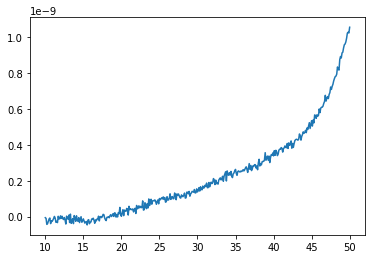

In [8]:
with open('Data/stickstoff2.csv', mode='r') as tf:
        data = np.genfromtxt((line.replace(',', '.') for line in tf),delimiter=";",skip_header=21).T
plt.plot(data[3],data[4])